In [1]:
import pandas as pd
csv_file_path = 'data/2017_StPaul_MN_Real_Estate.csv'
df = pd.read_csv(csv_file_path)

parquet_file_path = 'data/2017_StPaul_MN_Real_Estate.parquet'
df.to_parquet(parquet_file_path, engine='pyarrow')

In [2]:
from pyspark.sql import SparkSession

In [5]:
spark: SparkSession = SparkSession.builder.appName("ExampleApp").getOrCreate()

In [6]:
df = spark.read.parquet("data/2017_StPaul_MN_Real_Estate.parquet")

In [10]:
# Select our dependent variable
Y_df = df.select(['SALESCLOSEPRICE'])

# Display summary statistics
Y_df.describe().show()

+-------+------------------+
|summary|   SALESCLOSEPRICE|
+-------+------------------+
|  count|              5000|
|   mean|       262804.4668|
| stddev|140559.82591998563|
|    min|             48000|
|    max|           1700000|
+-------+------------------+



In [11]:
def check_load(df, num_records, num_columns):
  # Takes a dataframe and compares record and column counts to input
  # Message to return if the critera below aren't met
  message = 'Validation Failed'
  # Check number of records
  if num_records == df.count():
    # Check number of columns
    if num_columns == len(df.columns):
      # Success message
      message = 'Validation Passed'
  return message

# Print the data validation message
print(check_load(df, 5000, 74))

Validation Passed


In [12]:
validation_dict = {
    "AssumableMortgage": "string",
    "AssociationFee": "bigint",
    "SQFTBELOWGROUND": "bigint",
    "AssessedValuation": "double",
    "ASSESSMENTPENDING": "string",
}

In [13]:
# create list of actual dtypes to check
actual_dtypes_list = df.dtypes
print(actual_dtypes_list)

# Iterate through the list of actual dtypes tuples
for attribute_tuple in actual_dtypes_list:
  
  # Check if column name is dictionary of expected dtypes
  col_name = attribute_tuple[0]
  if col_name in validation_dict:

    # Compare attribute types
    col_type = attribute_tuple[1]
    if col_type == validation_dict[col_name]:
      print(col_name + ' has expected dtype.')

[('No.', 'bigint'), ('MLSID', 'string'), ('StreetNumberNumeric', 'bigint'), ('streetaddress', 'string'), ('STREETNAME', 'string'), ('PostalCode', 'bigint'), ('StateOrProvince', 'string'), ('City', 'string'), ('SalesClosePrice', 'bigint'), ('LISTDATE', 'string'), ('LISTPRICE', 'bigint'), ('LISTTYPE', 'string'), ('OriginalListPrice', 'bigint'), ('PricePerTSFT', 'double'), ('FOUNDATIONSIZE', 'bigint'), ('FENCE', 'string'), ('MapLetter', 'string'), ('LotSizeDimensions', 'string'), ('SchoolDistrictNumber', 'string'), ('DAYSONMARKET', 'bigint'), ('offmarketdate', 'string'), ('Fireplaces', 'bigint'), ('RoomArea4', 'string'), ('roomtype', 'string'), ('ROOF', 'string'), ('RoomFloor4', 'string'), ('PotentialShortSale', 'string'), ('PoolDescription', 'string'), ('PDOM', 'bigint'), ('GarageDescription', 'string'), ('SQFTABOVEGROUND', 'bigint'), ('Taxes', 'bigint'), ('RoomFloor1', 'string'), ('RoomArea1', 'string'), ('TAXWITHASSESSMENTS', 'double'), ('TAXYEAR', 'bigint'), ('LivingArea', 'bigint'), 

In [24]:
columns = [
    "FOUNDATIONSIZE",
    "DAYSONMARKET",
    "FIREPLACES",
    "PDOM",
    "SQFTABOVEGROUND",
    "TAXES",
    "TAXWITHASSESSMENTS",
    "TAXYEAR",
    "LIVINGAREA",
    "YEARBUILT",
    "ACRES",
    "BACKONMARKETDATE",
    "BATHSFULL",
    "BATHSHALF",
    "BATHQUARTER",
    "BATHSTHREEQUARTER",
    "BATHSTOTAL",
    "BEDROOMS",
    "SQFTBELOWGROUND",
    "ASSOCIATIONFEE",
    "ASSESSEDVALUATION",
]

In [26]:
# Name and value of col with max corr
corr_max = 0
corr_max_col = columns[0]

# Loop to check all columns contained in list
for col in columns:
    # Check the correlation of a pair of columns
    corr_val = df.corr('SALESCLOSEPRICE', col)
    # Logic to compare corr_max with current corr_val
    if corr_val > corr_max:
        # Update the column name and corr value
        corr_max = corr_val
        corr_max_col = col

print(corr_max_col)

LIVINGAREA


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

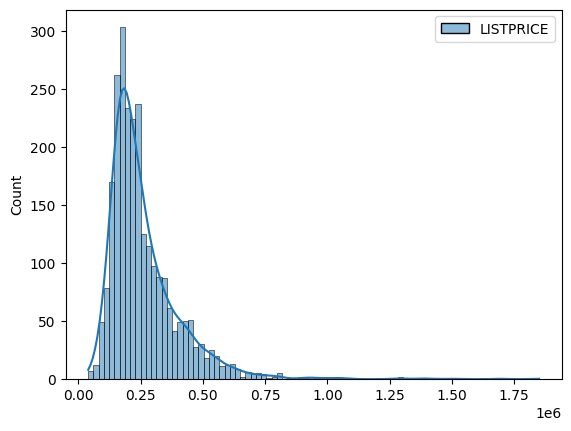

[Row(skewness(LISTPRICE)=2.790448093916559)]


In [32]:
# Select a single column and sample and convert to pandas
sample_df = df.select(['LISTPRICE']).sample(False, 0.5, 42)
pandas_df = sample_df.toPandas()

# Plot distribution of pandas_df and display plot
sns.histplot(pandas_df, kde=True)
plt.show()

# Import skewness function
from pyspark.sql.functions import skewness

# Compute and print skewness of LISTPRICE
print(df.agg({'LISTPRICE': 'skewness'}).collect())

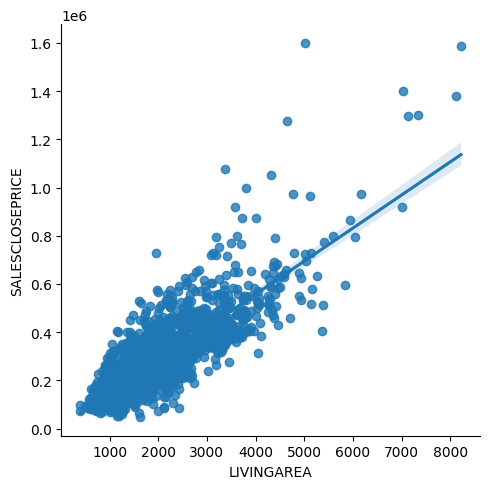

In [33]:
# Select a the relevant columns and sample
sample_df = df.select(['SALESCLOSEPRICE', 'LIVINGAREA']).sample(False, 0.5, 42)

# Convert to pandas dataframe
pandas_df = sample_df.toPandas()

# Linear model plot of pandas_df
sns.lmplot(x='LIVINGAREA', y='SALESCLOSEPRICE', data=pandas_df)
plt.show()